In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [61]:
data = pd.read_csv('input/BlackFriday.csv')

In [62]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [63]:
data = data.groupby('User_ID')['Purchase'].agg(['mean','count'])
data.rename(columns={'mean': 'Purchase', 'count': 'Items'}, inplace=True)

In [64]:
data

,Purchase,Items
User_ID,,
1000001,9808.264706,34
1000002,10662.539474,76
1000003,11780.517241,29
1000004,15845.153846,13
1000005,7745.292453,106
1000006,8248.913043,46
1000007,14651.687500,16
1000008,10480.855263,76
1000009,10420.350877,57


Text(0, 0.5, 'Number of Items')

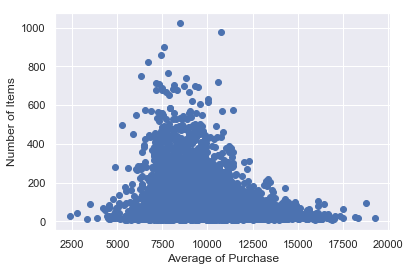

In [65]:
plt.scatter(data['Purchase'], data['Items'])
plt.xlabel('Average of Purchase')
plt.ylabel('Number of Items')

In [66]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
data_scaled

C:\Users\Samim Qeya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[ 0.03056136, -0.5405354 ],
       [ 0.47167651, -0.14401275],
       [ 1.0489579 , -0.58774048],
       ...,
       [-0.85880257, -0.76711977],
       [-0.76054965, -0.22898189],
       [-0.25964558,  0.73400169]])

In [67]:
wcss=[]

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

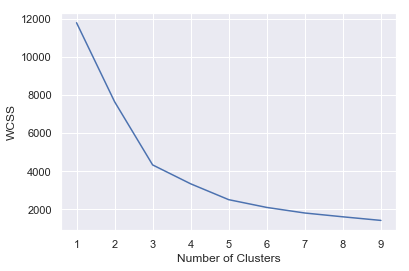

In [68]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [69]:
kmeans = KMeans(3)

In [70]:
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
identified_clusters = data.copy()
identified_clusters['Clusters'] = kmeans.fit_predict(data_scaled)

In [72]:
identified_clusters

,Purchase,Items,Clusters
User_ID,,,
1000001,9808.264706,34,0
1000002,10662.539474,76,1
1000003,11780.517241,29,1
1000004,15845.153846,13,1
1000005,7745.292453,106,0
1000006,8248.913043,46,0
1000007,14651.687500,16,1
1000008,10480.855263,76,1
1000009,10420.350877,57,1


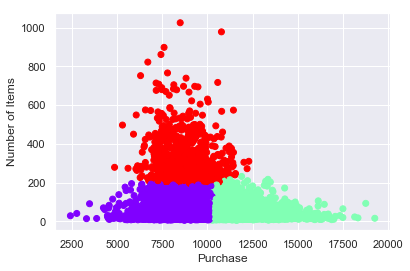

In [73]:
plt.scatter(identified_clusters['Purchase'], identified_clusters['Items'], c=identified_clusters['Clusters'], cmap='rainbow')
plt.xlabel('Purchase')
plt.ylabel('Number of Items')
plt.show()

In [74]:
identified_clusters['Clusters'].value_counts()

0    3175
1    1995
2     721
Name: Clusters, dtype: int64